In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
coffee = pd.read_csv('synthetic_coffee_health_10000.csv')

In [3]:
coffee.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [4]:
""" Exploring the data"""

' Exploring the data'

In [5]:
coffee.info

<bound method DataFrame.info of          ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0         1   40    Male  Germany            3.5        328.1          7.5   
1         2   33    Male  Germany            1.0         94.1          6.2   
2         3   42    Male   Brazil            5.3        503.7          5.9   
3         4   53    Male  Germany            2.6        249.2          7.3   
4         5   32  Female    Spain            3.1        298.0          5.3   
...     ...  ...     ...      ...            ...          ...          ...   
9995   9996   50  Female    Japan            2.1        199.8          6.0   
9996   9997   18  Female       UK            3.4        319.2          5.8   
9997   9998   26    Male    China            1.6        153.4          7.1   
9998   9999   40  Female  Finland            3.4        327.1          7.0   
9999  10000   42  Female   Brazil            2.9        277.5          6.4   

     Sleep_Quality   BMI  Heart

In [6]:
coffee.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [7]:
print(coffee.isnull().sum())

""" In this analysis even though the null values of the 'Health_Issues' columns are detected, they will not be delt with."""

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


" In this analysis even though the null values of the 'Health_Issues' columns are detected, they will not be delt with."

In [8]:
# In this analysis there two types of ML models, one for predicting sleeping hours and one for predicting sleep quality.
# So the data visualisation segment explores more around this two variables, of course much more analysis can be done and would be required
# for a general understandying of the dataset

Text(0.5, 1.0, 'Coffee and Sleep Quality')

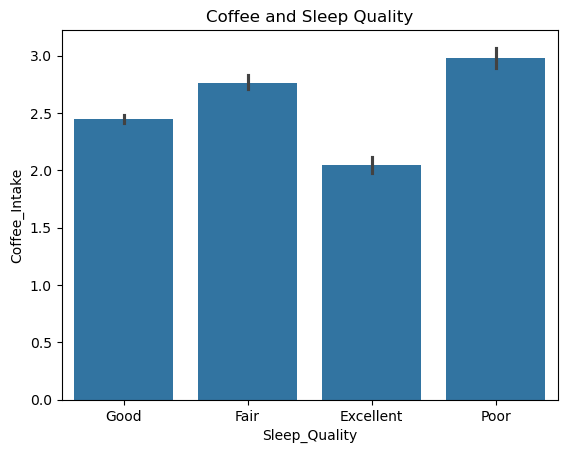

In [9]:
sns.barplot(x='Sleep_Quality', y='Coffee_Intake', data=coffee)
plt.title('Coffee and Sleep Quality')

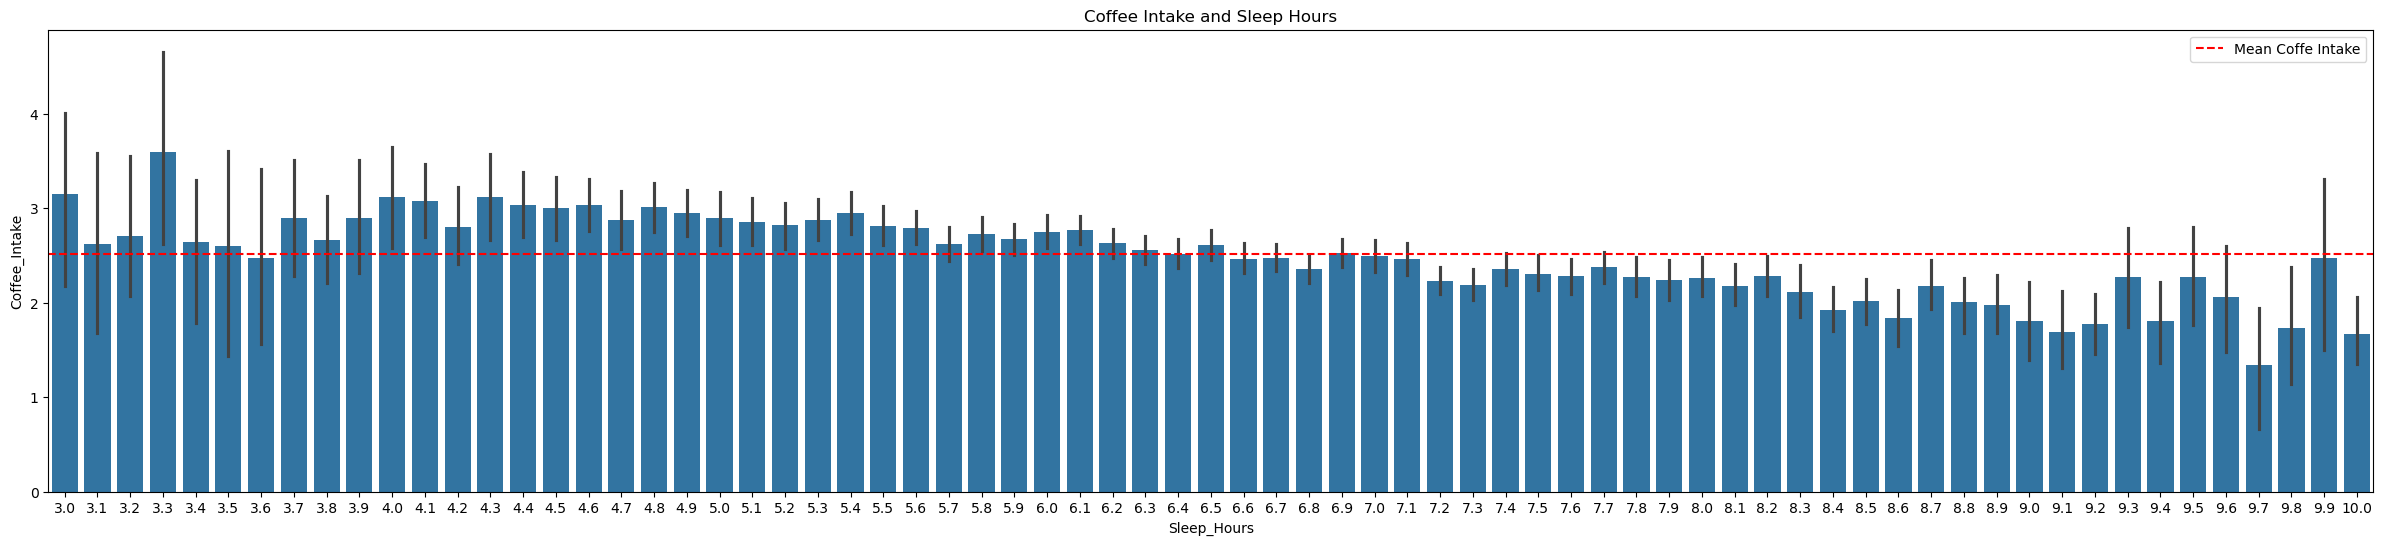

In [10]:
plt.figure(figsize=(30, 6))

# Then plot with Seaborn
sns.barplot(x='Sleep_Hours', y='Coffee_Intake', data=coffee)

plt.axhline(y=2.509, color='red', linestyle='--', label='Mean Coffe Intake')
plt.legend(loc="upper right")

plt.title('Coffee Intake and Sleep Hours')

plt.show()


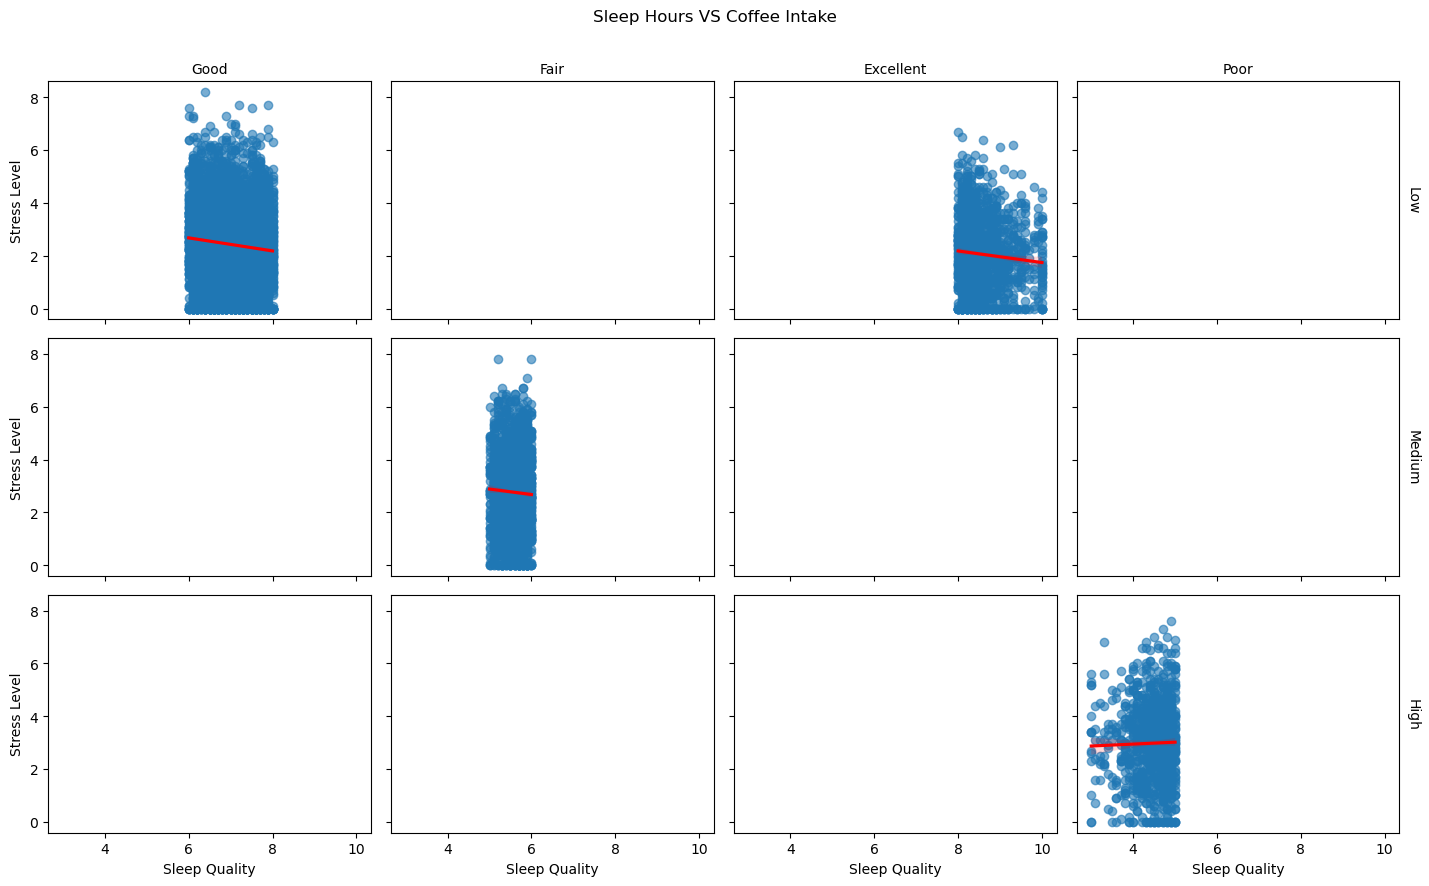

In [11]:
subplots = sns.FacetGrid(coffee, col = 'Sleep_Quality', row = 'Stress_Level', margin_titles = True, despine=False, height=3, aspect=1.2)

# Map regplot (scatter + reg line) onto each other
subplots.map(sns.regplot, 'Sleep_Hours', 'Coffee_Intake', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Add labels and titles

subplots.set_axis_labels('Sleep Quality', 'Stress Level')
subplots.set_titles(row_template='{row_name}', col_template='{col_name}')
subplots.fig.subplots_adjust(top=0.9)
subplots.fig.suptitle('Sleep Hours VS Coffee Intake')
plt.show()

In [12]:
# Calcualating the frequency of each unique value the coffee intake

c = coffee.Coffee_Intake.unique()
cups = pd.Series(c)
cups.sort_values(ascending=True)

# Creating a dictionary where the keys are the unique values of the coffee intake, which then are assigned to their frequencies 
fr_dict = {}
for i in cups.unique():   # loop through unique values
    fr_dict[i] = coffee.Coffee_Intake.loc[coffee.Coffee_Intake == i].count()
#print(fr_dict)

cups_df = pd.DataFrame(list(fr_dict.items()), columns = ['Cup', 'Frequency'])
cups_df.head()

,Cup,Frequency
0,3.5,193
1,1.0,170
2,5.3,46
3,2.6,264
4,3.1,255


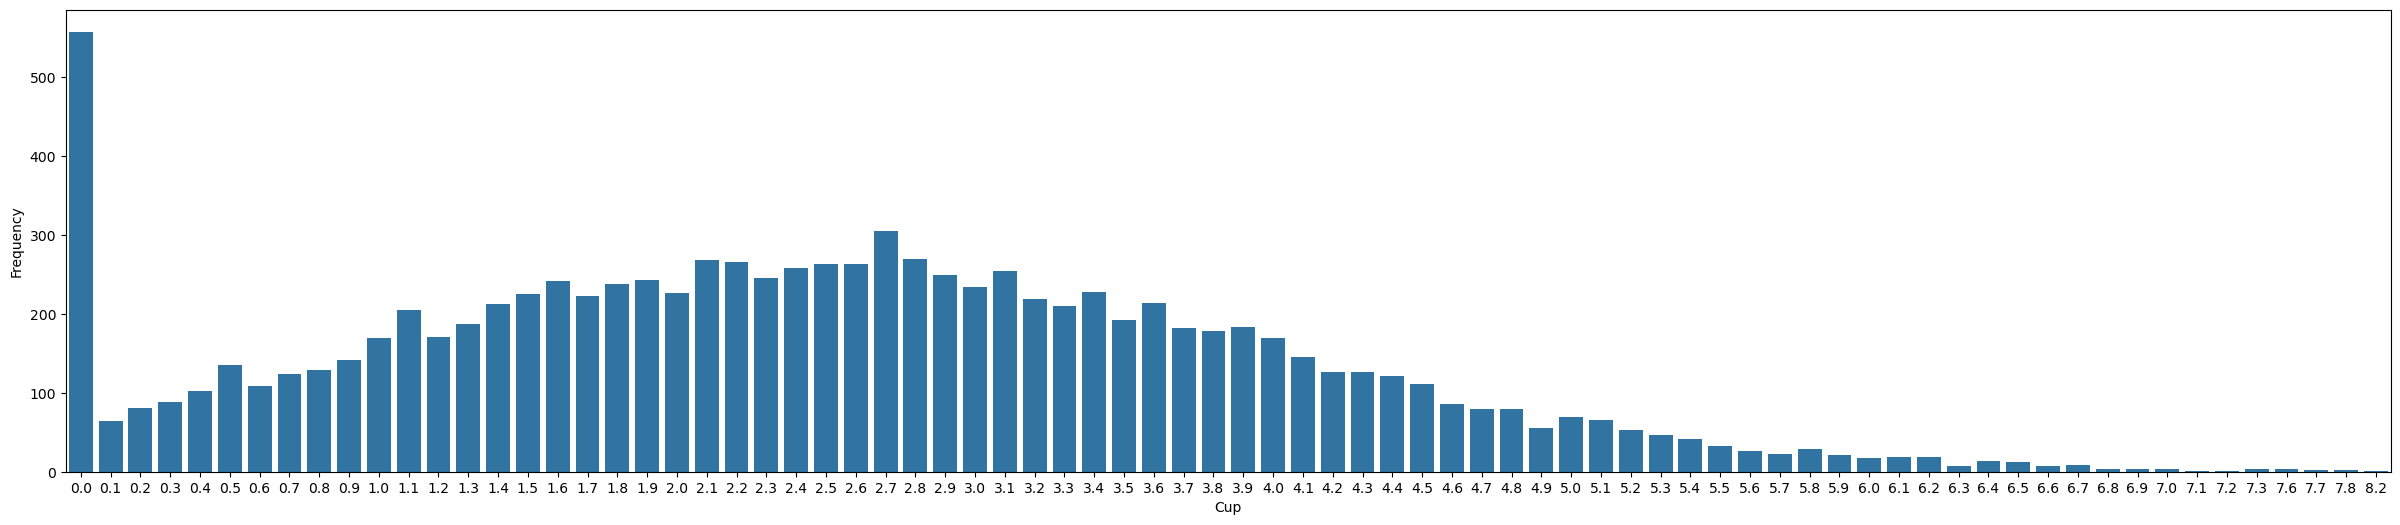

In [13]:
plt.figure(figsize=(30,6))
sns.barplot(x='Cup', y='Frequency', data=cups_df)

plt.show()

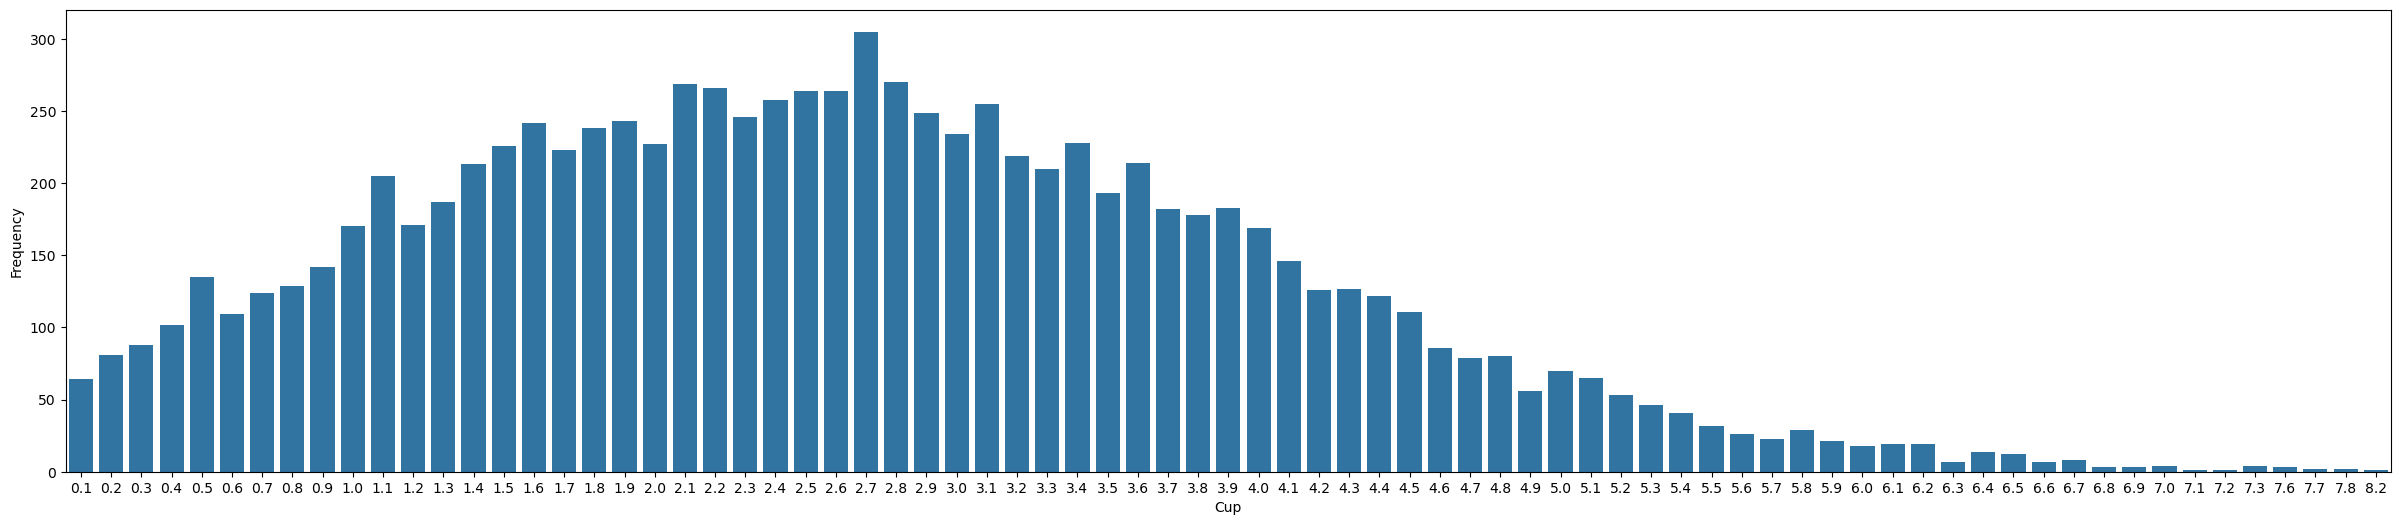

In [14]:
# I want to study the sleeping hours only for people who drink coffee, so I will discard those who don't

no_zero_coffee = cups_df[cups_df['Cup'] !=0]

plt.figure(figsize=(30,6))
sns.barplot(x='Cup', y='Frequency', data=no_zero_coffee)
plt.show()

In [15]:
""" Predicting sleep hours"""

' Predicting sleep hours'

In [48]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lreg = LinearRegression()

In [54]:
# Seperating features from target
from sklearn.metrics import mean_squared_error, r2_score
X = pd.get_dummies(coffee.drop('Sleep_Hours', axis=1), drop_first=True)
Y= coffee.Sleep_Hours

# Splitting the data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.4, random_state=3)

# Fitting the data
lreg.fit(X_train,Y_train)

# Generating predictions
pred_test = lreg.predict(X_test)

# Printing the mse
print(f'Fit a model X_train, and calcualte the MSE and r2 score with X_test and Y_test: mse:{mean_squared_error(Y_test, pred_test)} & r2_score:{r2_score(Y_test, pred_test)}')

Fit a model X_train, and calcualte the MSE and r2 score with X_test and Y_test: mse:0.23725078772503508 & r2_score:0.8411146968605969


In [20]:
'Predicting Quality Sleep'

'Predicting Quality Sleep'

In [55]:
#In this attempt the model is evaluated by a validating sample gathered from the training data. So the coffee data are 
#split in two groups the training data and the testing data. The training data are seperated into two other groups, the training data
#and the validating data and the evaluation of the model is made through the mean of the validating accuracy score.

In [28]:
lX = coffee.drop('Sleep_Quality', axis=1)
Y = coffee.Sleep_Quality

lX = pd.get_dummies(lX, drop_first=True)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=10000)
accuracy = []
scaler = StandardScaler()

for k in [2,5,8,12,99,234]:
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(lX, Y, test_size = 0.3, random_state=k)
    Dx_train, Dx_validating, Dy_train, Dy_validating = sklearn.model_selection.train_test_split(X_train, Y_train, test_size = 0.1, random_state=k)
    
    Dx_train = scaler.fit_transform(Dx_train)
    Dx_validating = scaler.fit_transform(Dx_validating)
    
    logreg.fit(Dx_train, Dy_train)
    Dy_pred = logreg.predict(Dx_validating)
    accuracy.append(accuracy_score(Dy_validating, Dy_pred))

print(f'Accuracies: {accuracy} \n The mean accuracy is: {sum(accuracy)/len(accuracy)}')

Accuracies: [0.9928571428571429, 0.9885714285714285, 0.9871428571428571, 0.99, 0.9857142857142858, 0.9785714285714285] 
 The mean accuracy is: 0.9871428571428571


In [56]:
""" Other ways to Sleep Quality (Other Classifiers) (simpler ways)"""

' Other ways to Sleep Quality (Other Classifiers) (simpler ways)'

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Setting up the target and features

lX = coffee.drop('Sleep_Quality', axis=1)
Y = coffee.Sleep_Quality
lX = pd.get_dummies(lX, drop_first=True)

# Split the data
logX_train, logX_test, logY_train, logY_test = sklearn.model_selection.train_test_split(lX, Y, test_size=0.4, random_state=3)

# Using k - neighbors classifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(logX_train, logY_train)

# Predict based on k - neighbor model
kY_pred = knn.predict(logX_test)

from sklearn import metrics

print(metrics.accuracy_score(logY_test, kY_pred))

0.46425


In [59]:
# Finding what k parameter gives the best results

In [74]:
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(logX_train, logY_train)
    kY_pred = knn.predict(logX_test)
#    print(f'For {k} neighbors the accuracy is {metrics.accuracy_score(logY_test, kY_pred)}')
    return metrics.accuracy_score(logY_test, kY_pred)


result={}

for k in range(1,45):
    result[k] = KNN(k)

result_df = pd.DataFrame(list(result.values()), index=list(result.keys()),columns=['Accuracy'])

#The best k - parameter and the best accuracy score
best_k = result_df['Accuracy'].idxmax()
best_accuracy = result_df['Accuracy'].max()


print(f'The best k - parameter is {best_k} and the best corresponding result is {best_accuracy}')

The best k - parameter is 44 and the best corresponding result is 0.5655


In [75]:
#Naive Bayers Classifer

In [79]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

naive_result = []

for ran in [0,55,3,9,21,45]:
    # Splitting the initial data into train and test:
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(lX, Y, random_state=ran, test_size=0.2)

    # Splitting the training data into train and validate
    X_t, X_v, Y_t, Y_v = sklearn.model_selection.train_test_split(X_train, Y_train, random_state=ran, test_size=0.2)
    
    GNB = GaussianNB()
    GNB.fit(X_t, Y_t)
    gY_pred = GNB.predict(X_t)
    print(f'The accuracy of Naive Bayes is {metrics.accuracy_score(Y_t, gY_pred)}')

    naive_result.append(metrics.accuracy_score(Y_t, gY_pred))

print(f'The accuracy score list: {naive_result} and the mean result is {sum(naive_result)/len(naive_result)}')

The accuracy of Naive Bayes is 0.97296875
The accuracy of Naive Bayes is 0.96484375
The accuracy of Naive Bayes is 0.9671875
The accuracy of Naive Bayes is 0.964375
The accuracy of Naive Bayes is 0.9721875
The accuracy of Naive Bayes is 0.96375
The accuracy score list: [0.97296875, 0.96484375, 0.9671875, 0.964375, 0.9721875, 0.96375] and the mean result is 0.9675520833333334
